In [113]:
%matplotlib inline

import csv
import json
import numpy as np
import pandas as pd
import datetime
import os.path
import matplotlib.image
import matplotlib.pyplot as plt

In [114]:
def readFile(filename):
    f = open(filename, 'r')
    js = json.loads(f.read())
    f.close()
    return js

In [115]:
dates = pd.Series(pd.date_range('2016-04-01', '2016-05-20')).apply(lambda x: x.strftime('%Y%m%d'))

In [116]:
path = './sokulee/A08/A08_20160512_steps.json'

step_data = readFile(path)

going_school = 0
for time in range(511,540): # 08:31 - 09:00  
    if step_data["activities-steps-intraday"]["dataset"][time]["value"] is not 0: # filter for 9 am student
        going_school = going_school + 1

step_per_min = []
if going_school > 5:
    for time in range(511,600): # 08:31 - 10:00
        step_per_min.append((step_data["activities-steps-intraday"]["dataset"][time]["time"][:5],
                            step_data["activities-steps-intraday"]["dataset"][time]["value"]))

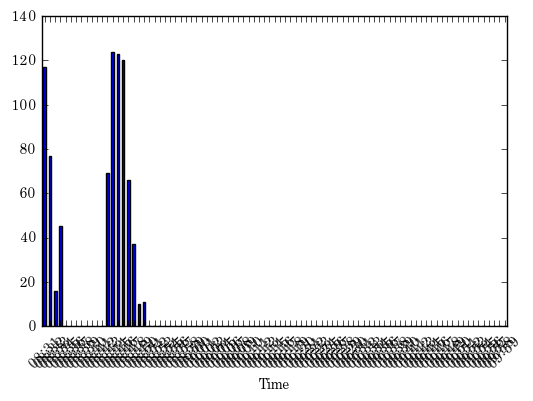

In [117]:
df = pd.DataFrame(step_per_min)
df.columns = ['Time', 'Steps']
df.plot(kind='bar', x = "Time", rot=45, legend=False);
plt.rc('font', family='AppleMyungjo')
take_class_9_am_count = plt.show()

In [118]:
def did_take_class(current_path):
    if os.path.exists(current_path): # Day steps

        csv_data = readFile(current_path)               
    
        going_school = 0
        listening_lecture = 0

        try:
            for time in range(511,540): # 08:31 - 09:00  
                if csv_data["activities-steps-intraday"]["dataset"][time]["value"] is not 0: # go to school
                    going_school = going_school + 1
        
            if going_school > 5:
                for time in range(541,570): # 09:01 - 09:30
                    if csv_data["activities-steps-intraday"]["dataset"][time]["value"] is 0: # take a class
                        listening_lecture = listening_lecture + 1

            if listening_lecture >= 20:
                #print(csv_data["activities-steps"][0]["dateTime"])
                return True
            
            return False

        except KeyError:
            return False
    
    return False

In [119]:
take_class_9_am_count = 0

path = './sokulee/A068/A068_'

dates_4_1_week = '20160401'
weeks_list = []
weeks_list.append(pd.Series(pd.date_range('2016-04-04', '2016-04-08')).apply(lambda x: x.strftime('%Y%m%d')))
weeks_list.append(pd.Series(pd.date_range('2016-04-11', '2016-04-15')).apply(lambda x: x.strftime('%Y%m%d')))
weeks_list.append(pd.Series(pd.date_range('2016-04-18', '2016-04-22')).apply(lambda x: x.strftime('%Y%m%d')))
weeks_list.append(pd.Series(pd.date_range('2016-04-25', '2016-04-29')).apply(lambda x: x.strftime('%Y%m%d')))
weeks_list.append(pd.Series(pd.date_range('2016-05-02', '2016-05-06')).apply(lambda x: x.strftime('%Y%m%d')))
weeks_list.append(pd.Series(pd.date_range('2016-05-09', '2016-05-13')).apply(lambda x: x.strftime('%Y%m%d')))
weeks_list.append(pd.Series(pd.date_range('2016-05-16', '2016-05-20')).apply(lambda x: x.strftime('%Y%m%d')))

file_path = path + dates_4_1_week + '_steps.json'
 
if did_take_class(file_path):
    take_class_9_am_count = take_class_9_am_count + 1

for week in weeks_list:
    for date in week:
        if date == '20160505':
            continue
        file_path = path + date + '_steps.json'
        if did_take_class(file_path):
            take_class_9_am_count = take_class_9_am_count + 1

In [120]:
user_take_class_9_am_count = []

prefix = 'A0'
path = './sokulee/' + prefix

for user_num in range(1,100):
    
    take_class_9_am_count = 0
    
    directory_num = path + str(user_num) + '/'
    
    if os.path.isdir(directory_num): # User
        user = prefix + str(user_num)
        
        file_path = directory_num + user + "_" + dates_4_1_week + '_steps.json'
        if did_take_class(file_path):
            take_class_9_am_count = take_class_9_am_count + 1
            
        for week in weeks_list:
            for date in week:
                if date == '20160505':
                    continue
                file_path = directory_num + user + "_" + date + '_steps.json'    
                if did_take_class(file_path):
                    take_class_9_am_count = take_class_9_am_count + 1

        user_take_class_9_am_count.append((user, take_class_9_am_count))

In [121]:
df = pd.DataFrame(user_take_class_9_am_count)
df.columns = ['user_number', 'total_9_am_class']
result = df.sort_values(by=['total_9_am_class'], ascending=False)[0:10]
result

,user_number,total_9_am_class
54,A068,16
22,A030,14
33,A041,13
6,A07,12
10,A017,12
17,A025,11
13,A020,11
50,A061,10
65,A096,10
7,A08,10


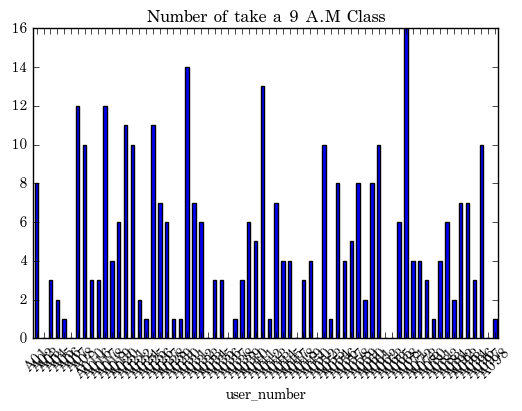

In [122]:
df.plot(kind='bar', x='user_number', rot=45, legend=False);
plt.title('Number of take a 9 A.M Class')
plt.show()

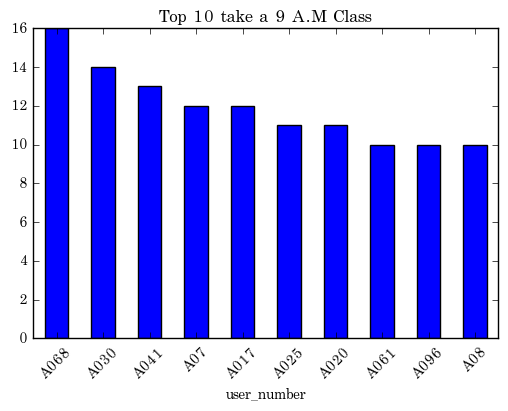

In [123]:
result.plot(kind='bar', x='user_number', rot=45, legend=False);
plt.title('Top 10 take a 9 A.M Class')
plt.show()